# Ingeniería de Características: Creación de Nuevas Variables (Core)


## Descripción:

En esta actividad, trabajarás con el dataset “Titanic – Machine Learning from Disaster” disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

Enlace al dataset: https://www.kaggle.com/c/titanic

## Objetivo:

El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.


# 1. Carga de datos:

  – Descarga y carga el dataset “Titanic” desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
  
  – Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/3_Core_train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [146]:
df.shape

(891, 12)

In [147]:
# Verificando si hay datos nulos (%)
print("Valores nulos:")
print(df.isnull().sum() * 100 / len(df))
print("\n")

# Verificando si hay duplicados
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

Valores nulos:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Valores duplicados:
0




In [148]:
# Detectar outliers en variables numéricas
def outliers_IQR(df):
    # Filtrar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1               # Rango intercuartílico

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Llamar a la función
outliers_IQR(df)


🚩 Outliers detected in PassengerId: 0

🚩 Outliers detected in Survived: 0

🚩 Outliers detected in Pclass: 0

🚩 Outliers detected in Age: 11

🚩 Outliers detected in SibSp: 46

🚩 Outliers detected in Parch: 213

🚩 Outliers detected in Fare: 116


In [149]:
df.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [150]:
for col in df.columns:
  print(f"\nColumna: {col}")
  print(f"\nValores únicos: {df[col].unique()}")
  print(f"\nTipo de dato: {df[col].dtype}")
  print("-" * 20)


Columna: PassengerId

Valores únicos: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237

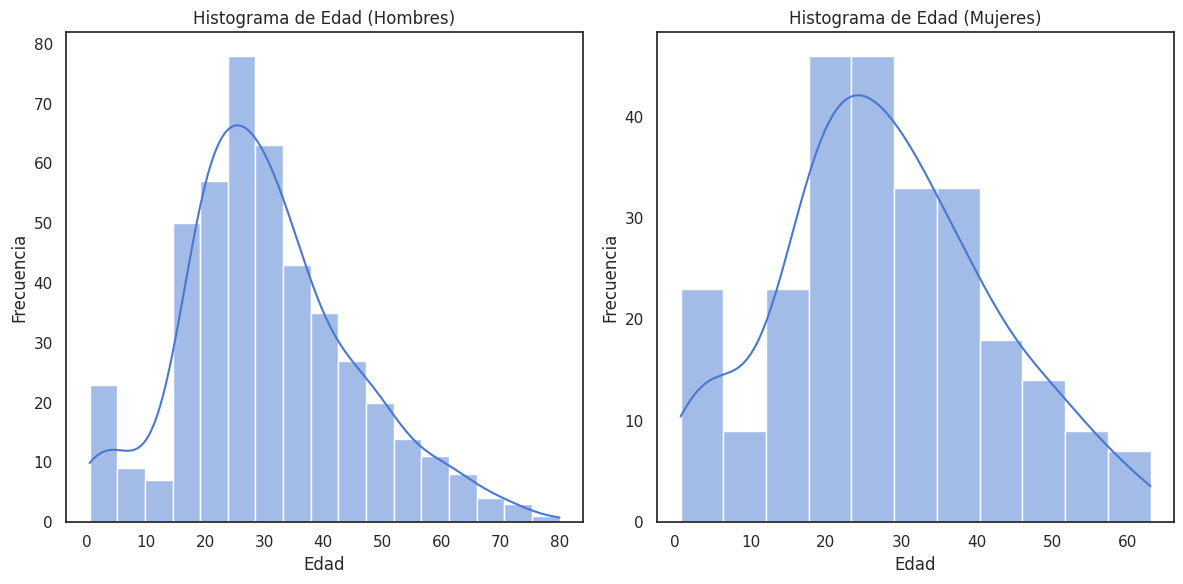

In [151]:
# Revisar la distribución por edad por separado en el Sex
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Sex'] == 'male']['Age'], kde=True)
plt.title('Histograma de Edad (Hombres)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Sex'] == 'female']['Age'], kde=True)
plt.title('Histograma de Edad (Mujeres)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

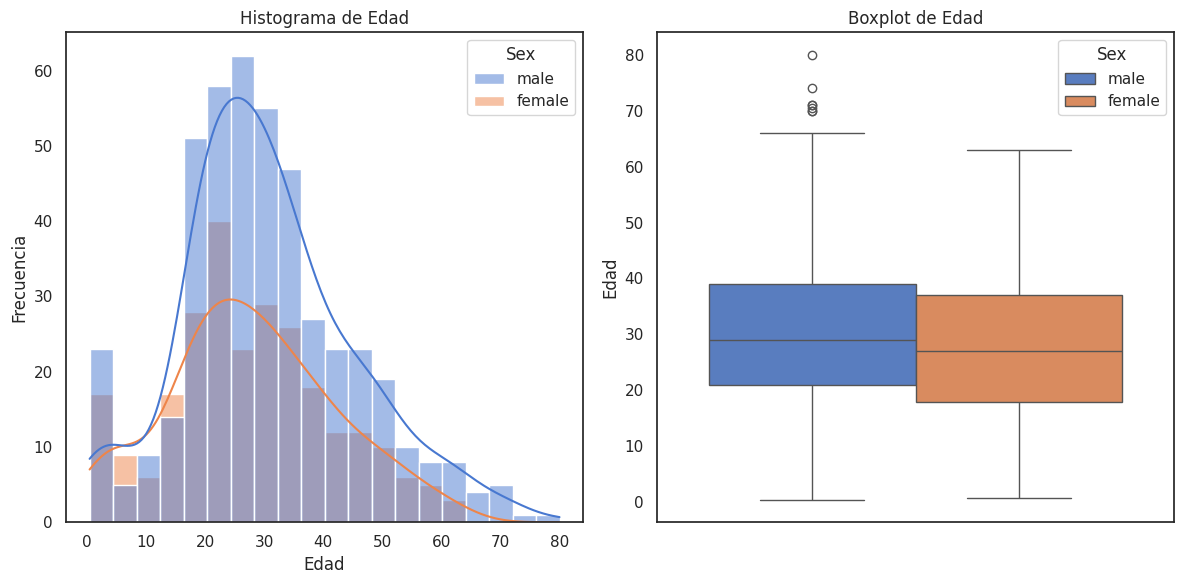

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Sex', kde=True) # Pass the entire DataFrame and specify x and hue
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age', hue='Sex') # Pass the entire DataFrame and specify x and hue
plt.title('Boxplot de Edad')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

In [153]:
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


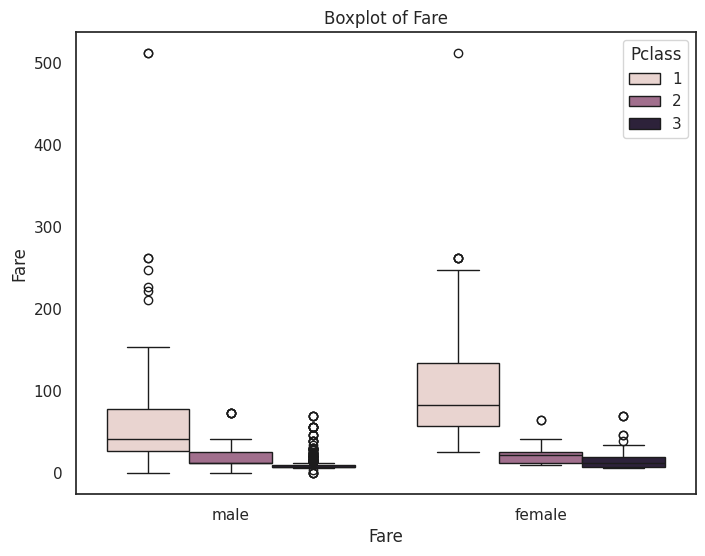

In [154]:
# Revisando Fare por otras variables para analizar
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Fare', x='Sex', hue= 'Pclass')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()


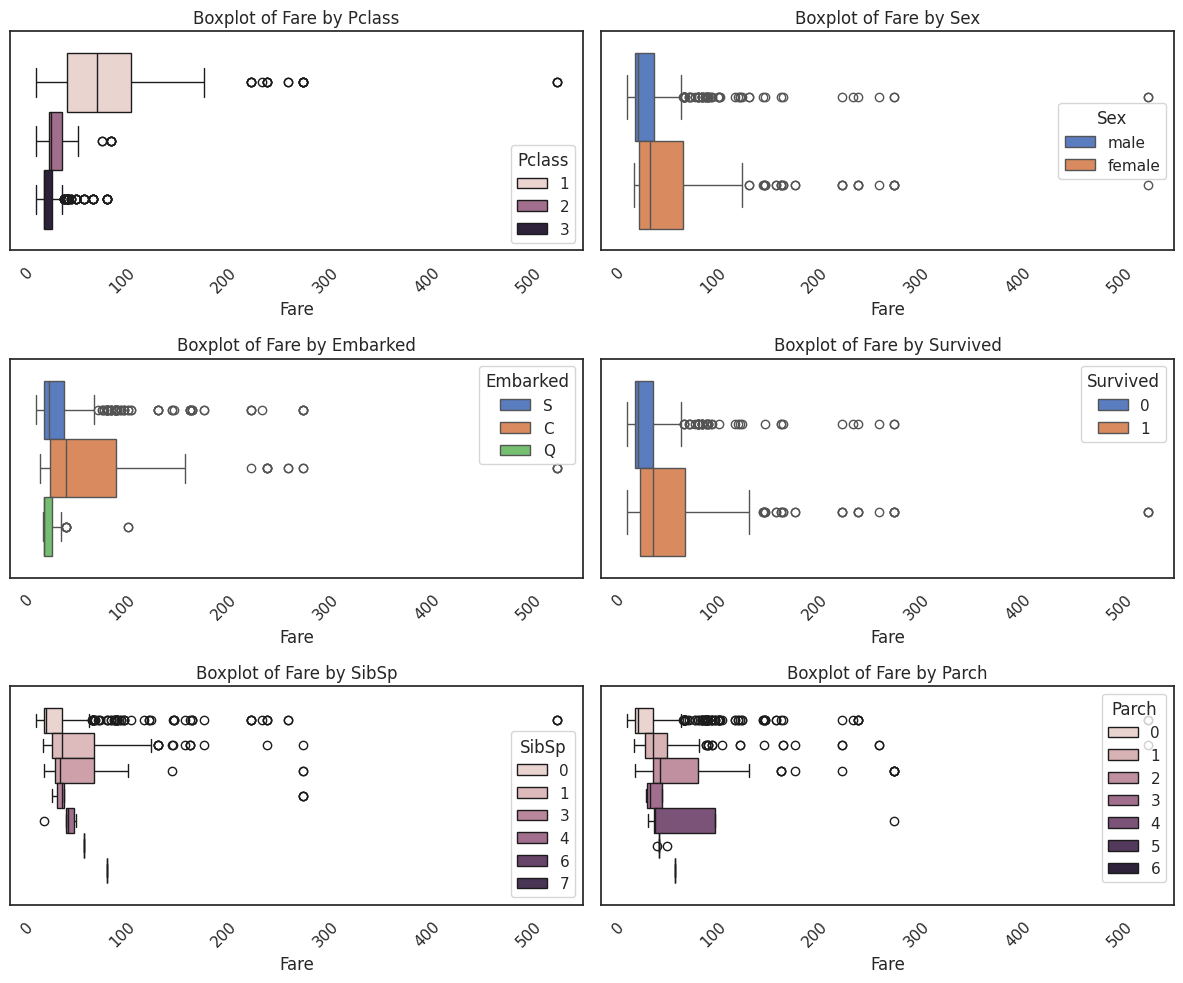

In [155]:
# Create the boxplots
plt.figure(figsize=(12, 10))  # Adjust figure size for better visualization

for i, hue_col in enumerate(['Pclass', 'Sex', 'Embarked', 'Survived', 'SibSp', 'Parch']):
    plt.subplot(3, 2, i + 1)  # Create subplots for each hue
    sns.boxplot(x='Fare', data=df, hue=hue_col)
    plt.title(f'Boxplot of Fare by {hue_col}')
    plt.xlabel('Fare')
    plt.ylabel('') # Remove the y-axis label for cleaner look
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()


## Análisis

Se realizó la carga de datos y en un primer pantallazo de revisión del dataset, se aprecia que hay presencia de valores nulos.

Al revisarse puntualmente, la variable edad tiene casi 20% de los nulos, si se eliminan se pasa de 891 filas a aproximadamente 712, si bien es algo que se puede considerar, o se podría revisar como se da el ejercicio con la eliminación de nulos vs la imputación de estos. En el caso de Embarked, el porcentaje de valores nulos es menor al 1%, por lo que posiblemente “se corrija” al realizarse algún tratamiento, ya que por ejemplo en la variable Cabin, se debería revisar si se va a utilizar para algo, ya que con tal cantidad de datos nulos (77%) lo mejor es eliminar la columna, o trabajar con solo el 20-23% de los datos (200 filas aproximadamente, de 891).

Hay valores outliers en algunas columnas, Age es una de las solicitadas, así como Fare, esto se debería revisar puntualmente.

En el caso de edad si es evidente que las mujeres por ejemplo llegan solo hasta los 60 años, mientras que los hombres hasta los 80, y posiblemente por ello se deban los outliers, los cuales considero que son importantes, dado la diferencia el volumen de las clases den Sex, donde es evidente que hay muchos más hombres que mujeres (65% de los datos).

Y en el caso de las otras variables con outliers, revisando con Fare y comparando esta variable con otras, es complejo que estos outliers estén “distribuidos” de forma que no pareciera haber patrones, pero si que la mayor cantidad están cuando Parch o SibSp toma valores de 0 o 1


# 2. Exploración y preprocesamiento de datos:

  – Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
  
  – Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

In [156]:
# Codificar variables categóricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [157]:
# Imputar datos nulos de la columna age con KNN
from sklearn.impute import KNNImputer

# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Seleccionar las columnas numéricas para la imputación
numeric_cols = ['Age', 'Embarked']

# Aplicar la imputación a las columnas seleccionadas
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [158]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [159]:
outliers_IQR(df)


🚩 Outliers detected in PassengerId: 0

🚩 Outliers detected in Survived: 0

🚩 Outliers detected in Pclass: 0

🚩 Outliers detected in Sex: 0

🚩 Outliers detected in Age: 66

🚩 Outliers detected in SibSp: 46

🚩 Outliers detected in Parch: 213

🚩 Outliers detected in Fare: 116

🚩 Outliers detected in Embarked: 0


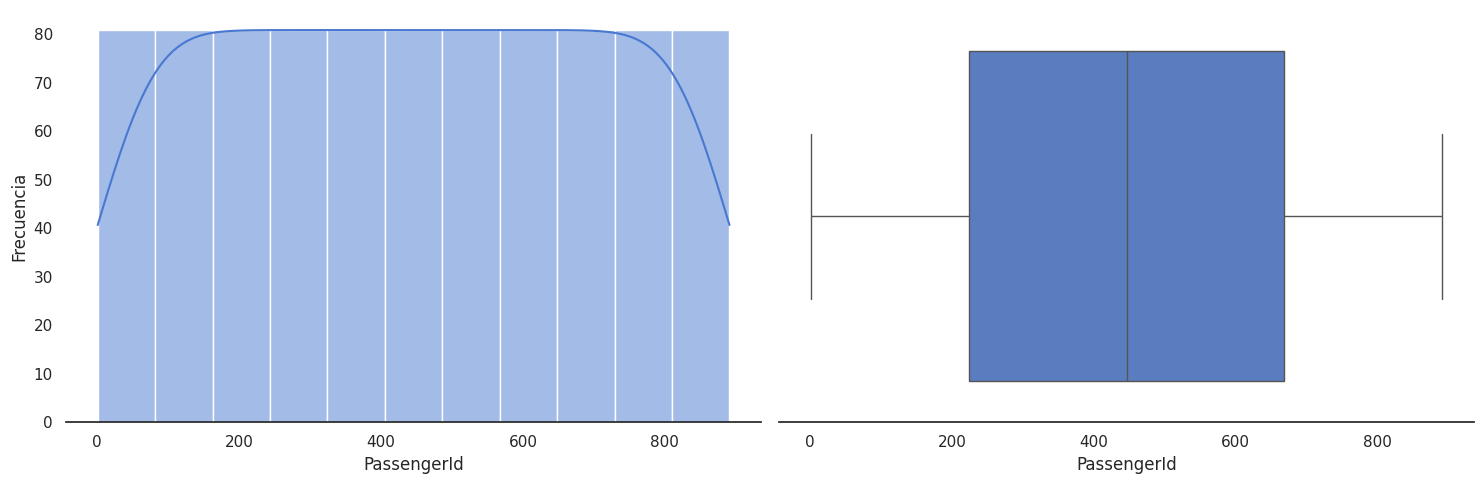

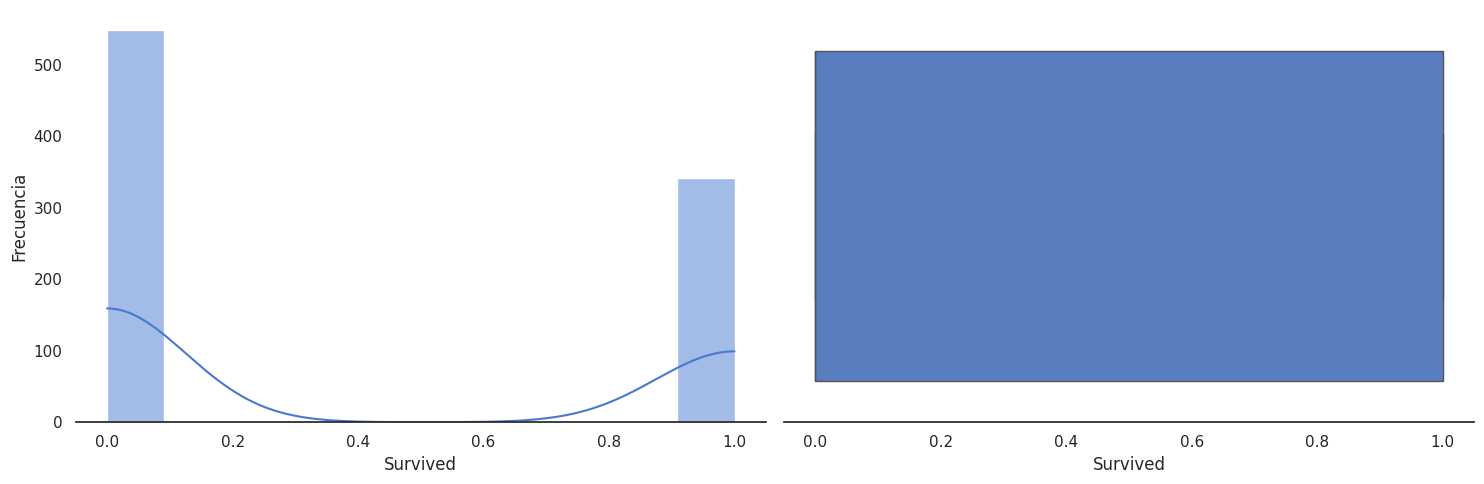

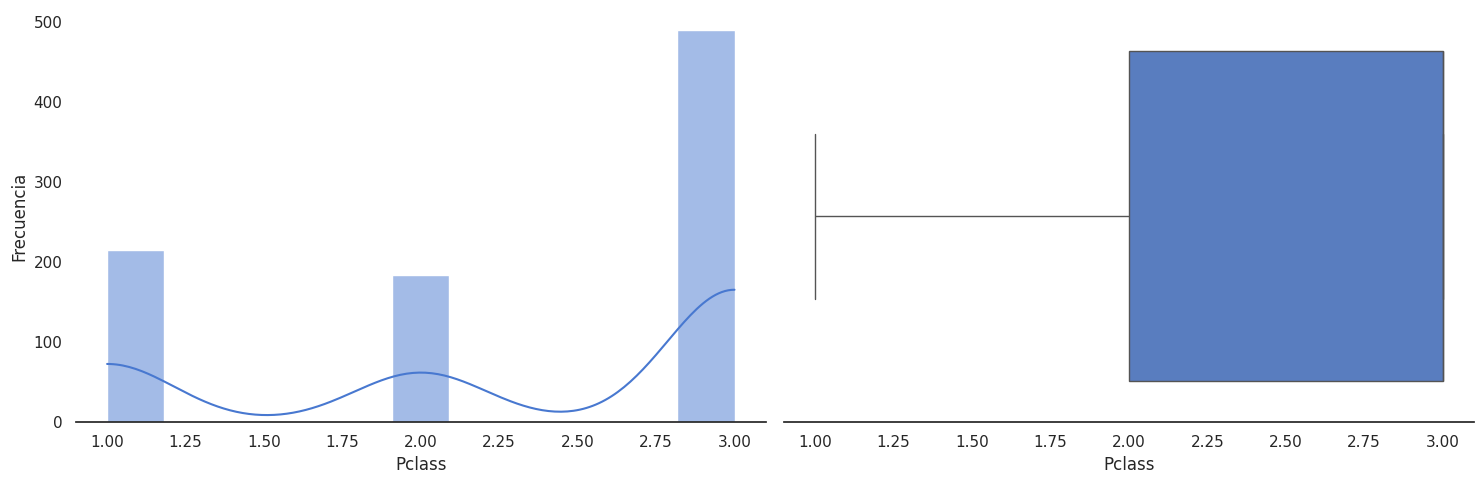

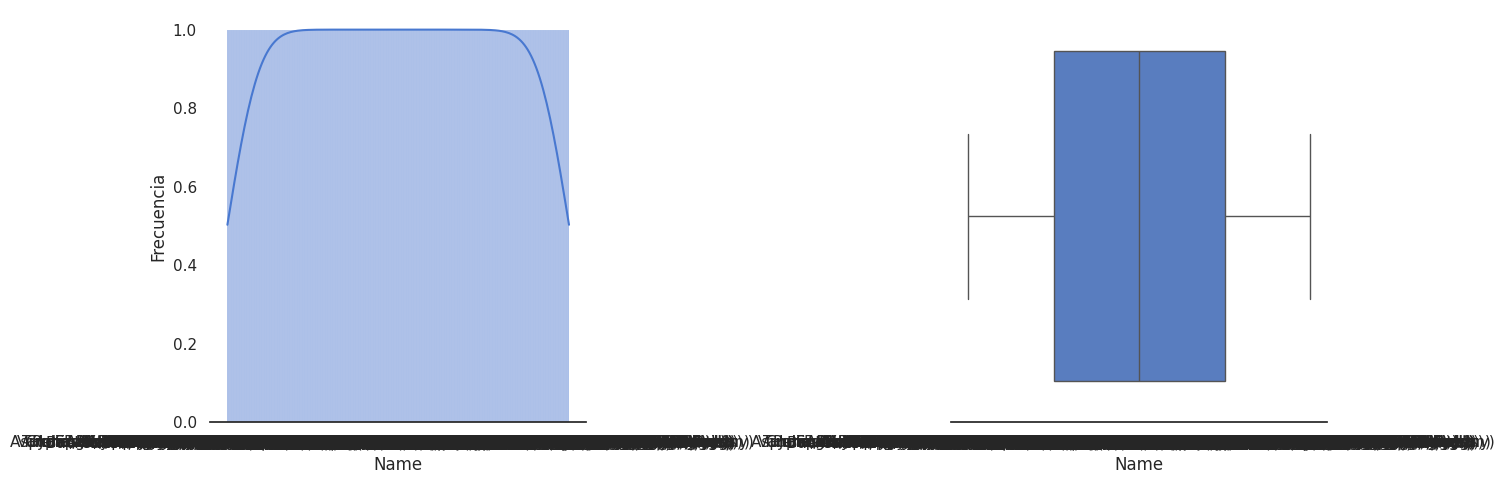

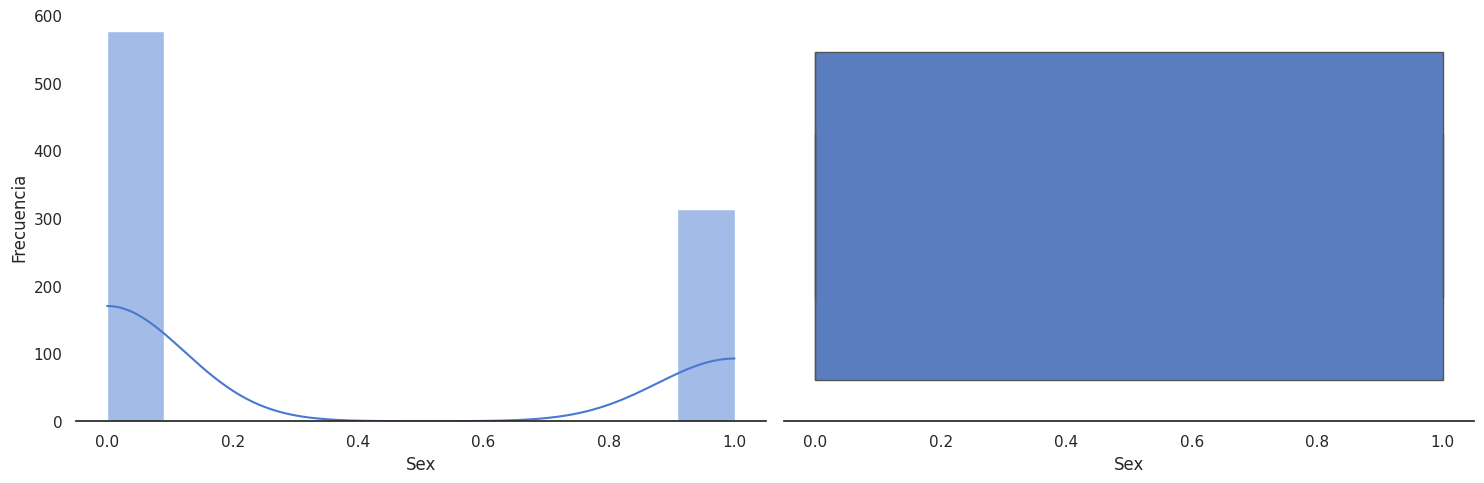

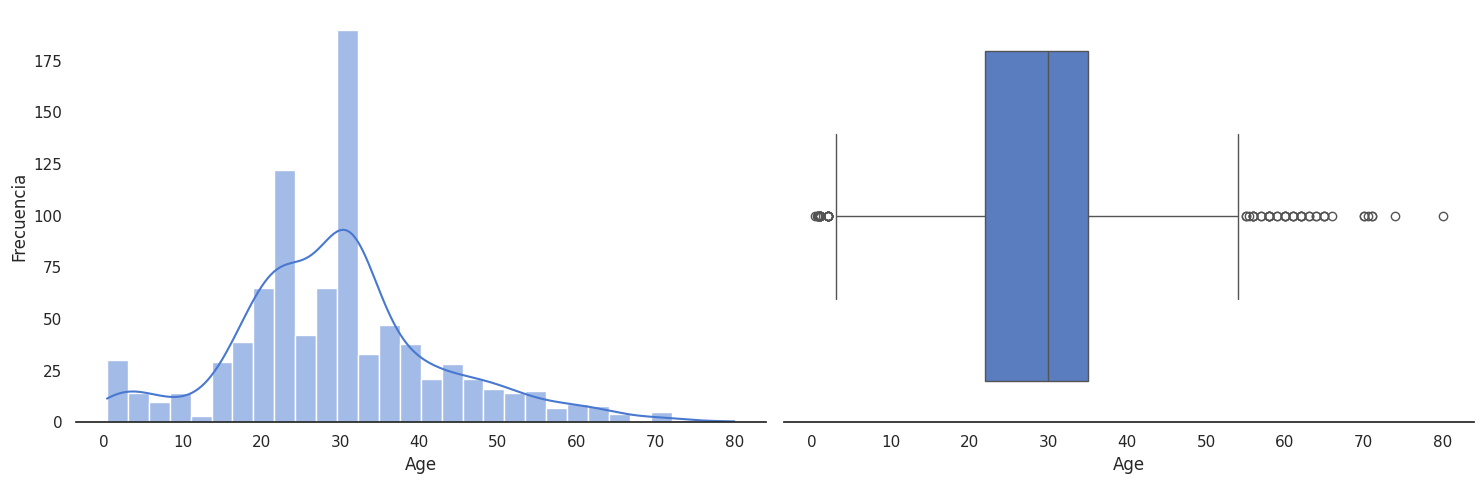

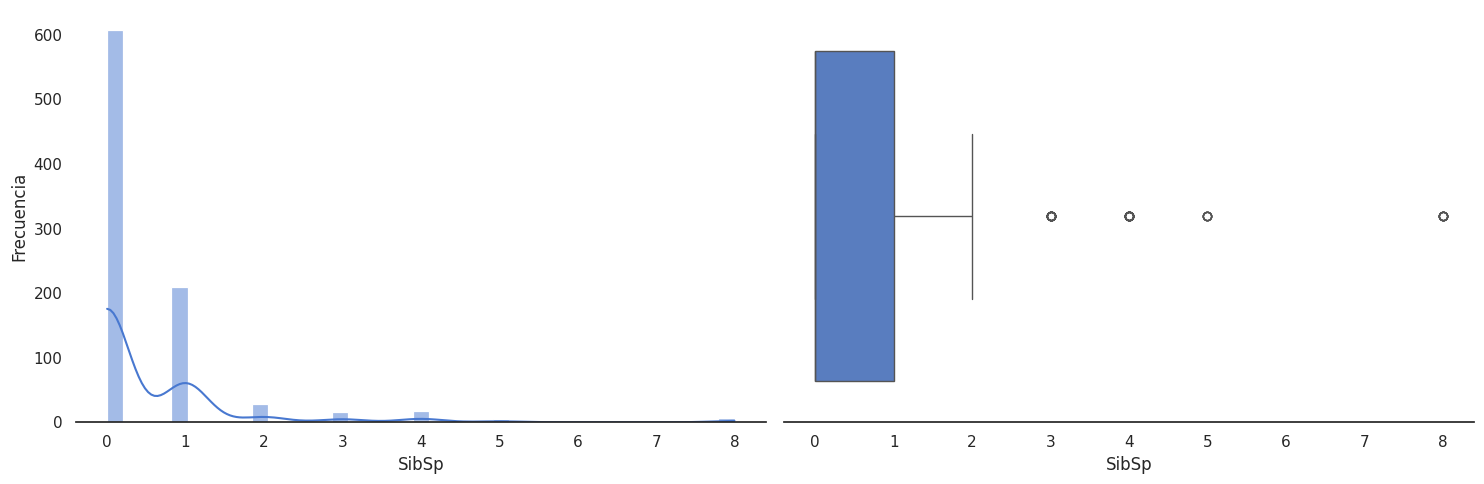

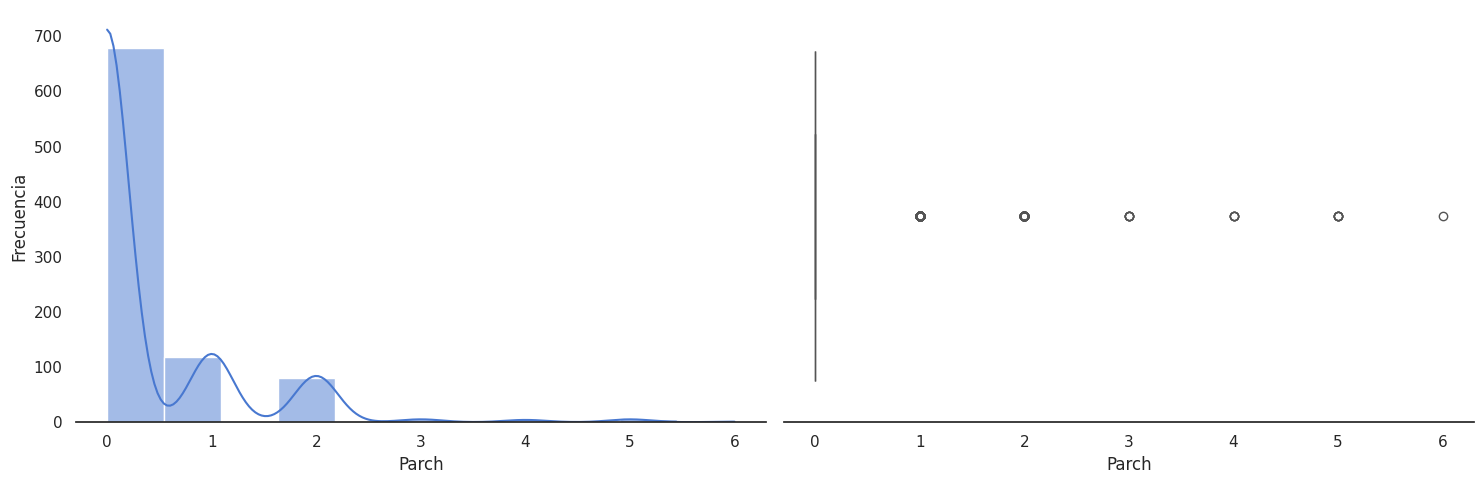

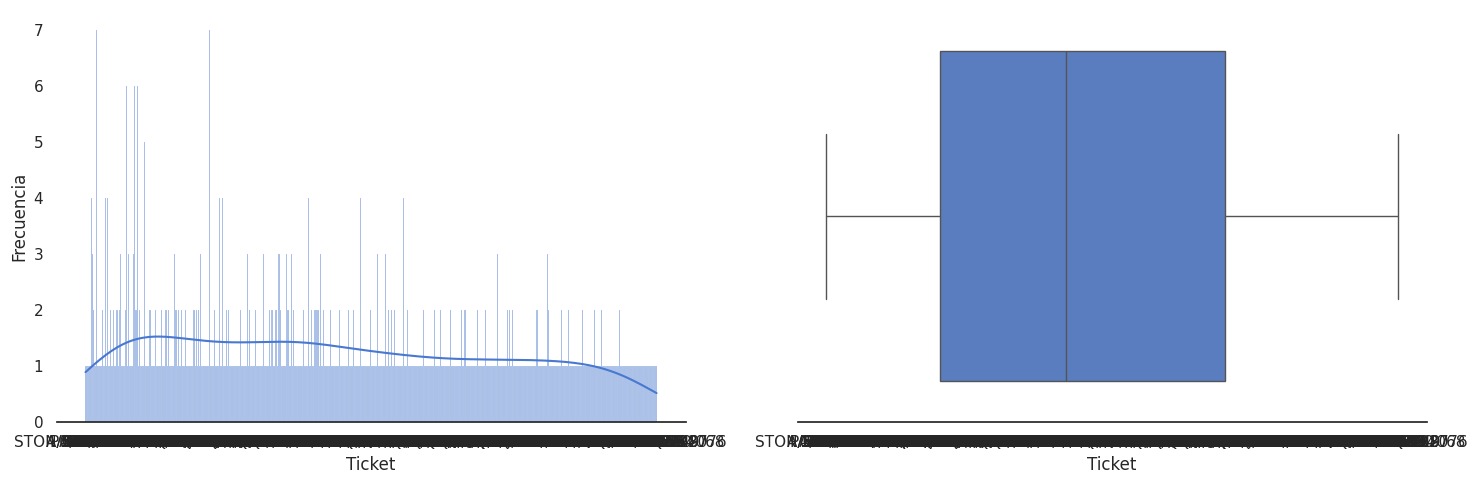

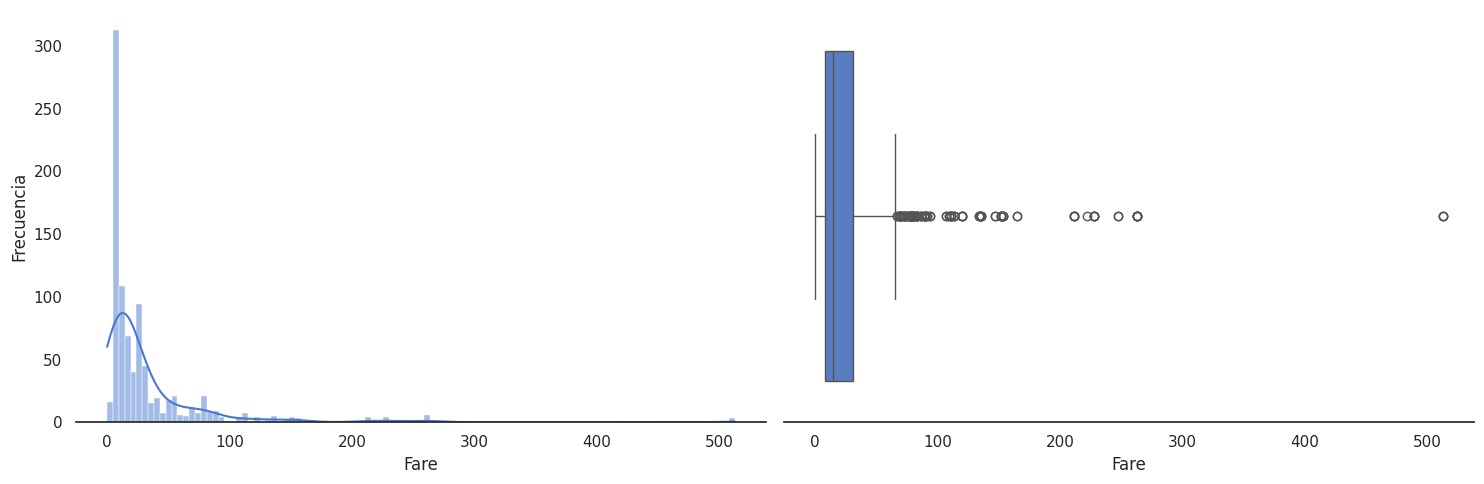

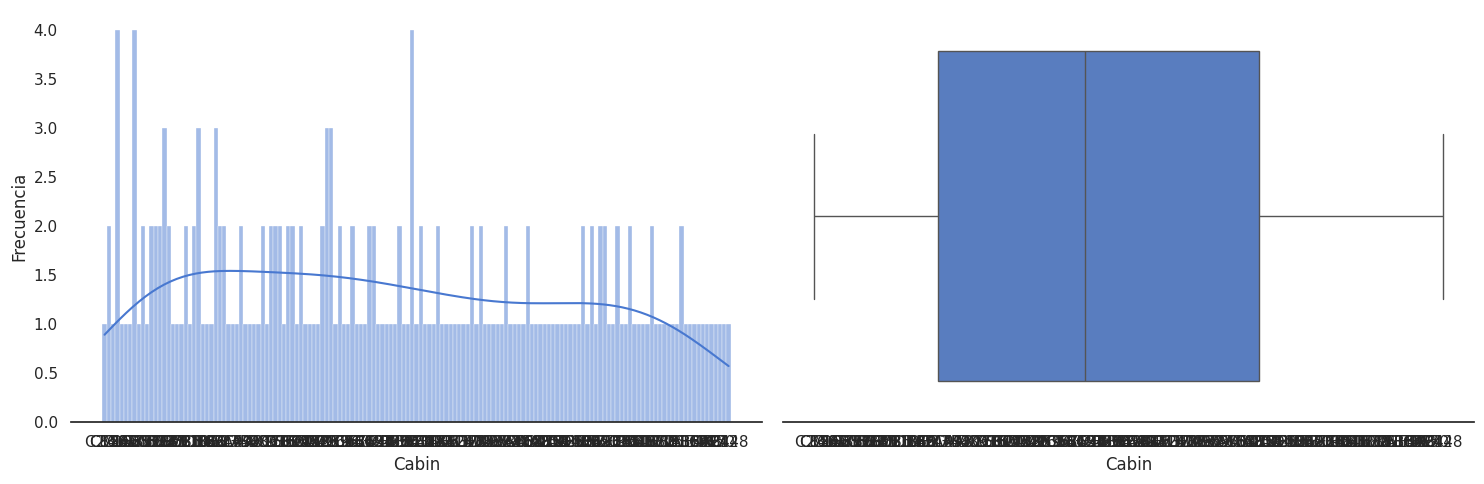

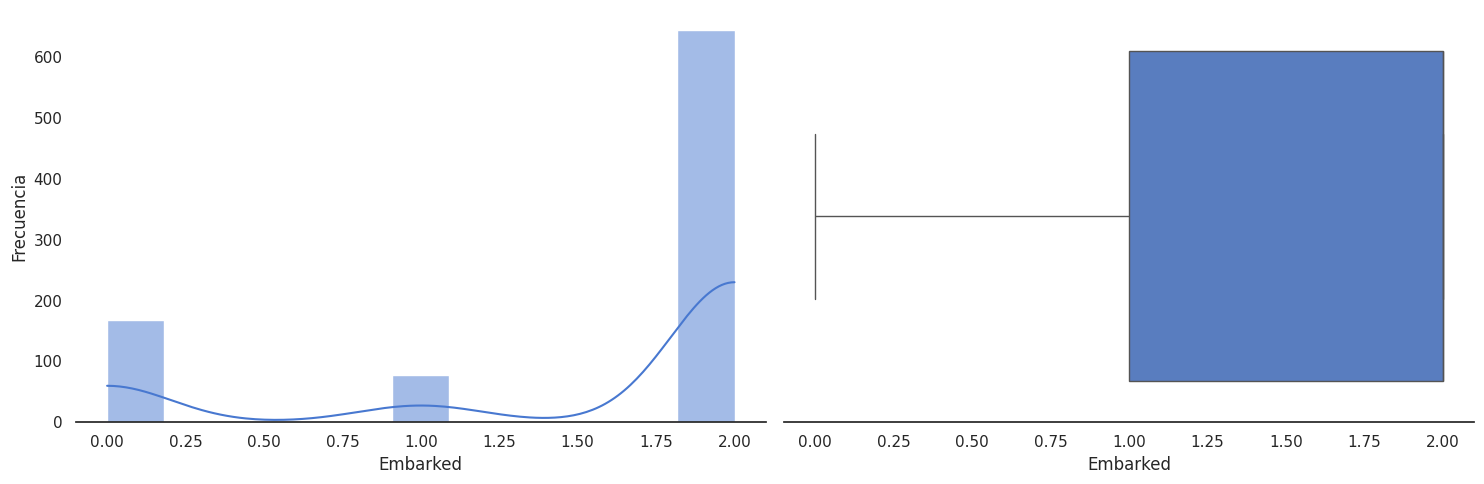

In [160]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

In [161]:
# Valores únicos y "extremos" de Fare
print(df['Fare'].value_counts().sort_index())

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64


In [162]:
# Tratar outliers con el método simple usando IQR
def tratar_outliers_simple(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)
    return df

# Columnas a tratar
columnas_para_tratar = ['Fare'] #'Age', 'Parch', 'SibSp']

# Aplicar a cada columna
for columna in columnas_para_tratar:
    df = tratar_outliers_simple(df, columna)

In [163]:
outliers_IQR(df)


🚩 Outliers detected in PassengerId: 0

🚩 Outliers detected in Survived: 0

🚩 Outliers detected in Pclass: 0

🚩 Outliers detected in Sex: 0

🚩 Outliers detected in Age: 66

🚩 Outliers detected in SibSp: 46

🚩 Outliers detected in Parch: 213

🚩 Outliers detected in Fare: 0

🚩 Outliers detected in Embarked: 0


In [164]:
df_no_Cabin = df.copy()

# Eliminar la columna 'Cabin'
df_no_Cabin = df_no_Cabin.drop('Cabin', axis=1)

In [165]:
df_no_Cabin.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Análisis

Se realizó la codificación de las variables categóricas que se consideró, y se imputó Age y Embarked con KNN ya que me parece más adecuado, dado que imputar casi 20% de los datos con la media o la mediana puede generar inconvenientes y sesgar los modelos, mientras que con KNN puede permitirse más aleatoriedad e incluso similaritud a lo que pudo haber sido “real”

Si bien se trataron los datos outliers, se deberían trabajar antes del modelado o ejecución de algún algoritmo, ya que se trabajará a partir de este momento con dos data set, uno sin la variable Cabin y otro con esta (ya que más adelante se usará una nueva variable basada en esta)

En cuando a la distribución de las variables, la mayor cantidad de datos pertenece a 3° clase, al sexo masculino, y tienen 0 parientes o hermanos, llama la atención que hay demasiados datos o que la mayor concentración de los datos en cuanto a Fare (precio del boleto) se concentran en el rango de 0 a 31, con extremos como 512, pero sugiere que hay 15 personas que no pagaron por el boleto, y 3 con costo de casi el doble del penúltimo valor más alto.




# 3. Creación de nuevas características:

  – Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
  
  – Tamaño de la familia: Combina las variables “SibSp” (número de hermanos/esposos) y “Parch” (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
  
  – Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
  
  – Categoría de tarifa: Agrupa la variable “Fare” en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
  
  – Título del pasajero: Extrae el título de cada pasajero desde la variable “Name” y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

In [166]:
# Tamaño de la familia
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Se aplica + 1, considerando la persona a la que se le atribuye el dato o fila de datos

In [167]:
# Cabina desconocida
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [168]:
# Estadísticas de Fare
df['Fare'].describe().round().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,24.0,20.0,0.0,8.0,14.0,31.0,66.0


In [169]:
# Categoría de tarifa, se realizó basandose en los cuantiles
df['FareCategory'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.45, 31.0, 512.329], labels=[0, 1, 2, 3], include_lowest=True, duplicates='drop')

df['FareCategory'] = df['FareCategory'].cat.codes.astype(int)

In [170]:
# Según se observó arriba, estos títulos terminan en '.', así que sería extrear esta palabra de Name
# Si bien lo intenté de varias maneras, se me dificultó en varias partes, así que con GPT pude ver bien mi error

# Título del pasajero
# Extraer el "título" de Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Crear una nueva variable categórica
df['Title'] = df['Title'].astype('category')

# Mostrar los títulos únicos y su cantidad
print(df['Title'].value_counts().sort_index())

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: count, dtype: int64


In [171]:
# Reemplazar títulos menos frecuentes por "Other"
df['Title'] = df['Title'].replace(['Master', 'Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'], 'Other')

# Mostrar los títulos únicos y su cantidad
print(df['Title'].value_counts().sort_index())


Title
Other     67
Miss     182
Mr       517
Mrs      125
Name: count, dtype: int64


<ipython-input-171-fc790270fe8b>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Title'] = df['Title'].replace(['Master', 'Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'], 'Other')


In [172]:
# Codificar esta variable Title para poder revisarla en correlaciones y modelos
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    float64
 12  FamilySize    891 non-null    int64  
 13  HasCabin      891 non-null    int64  
 14  FareCategory  891 non-null    int64  
 15  Title_Other   891 non-null    bool   
 16  Title_Miss    891 non-null    bool   
 17  Title_Mr      891 non-null    bool   
 18  Title_Mrs     891 non-null    

In [176]:
# Convertir  las columnas de 'Title' a tipo int
title_columns = [col for col in df.columns if col.startswith('Title_')]
df[title_columns] = df[title_columns].astype(int)

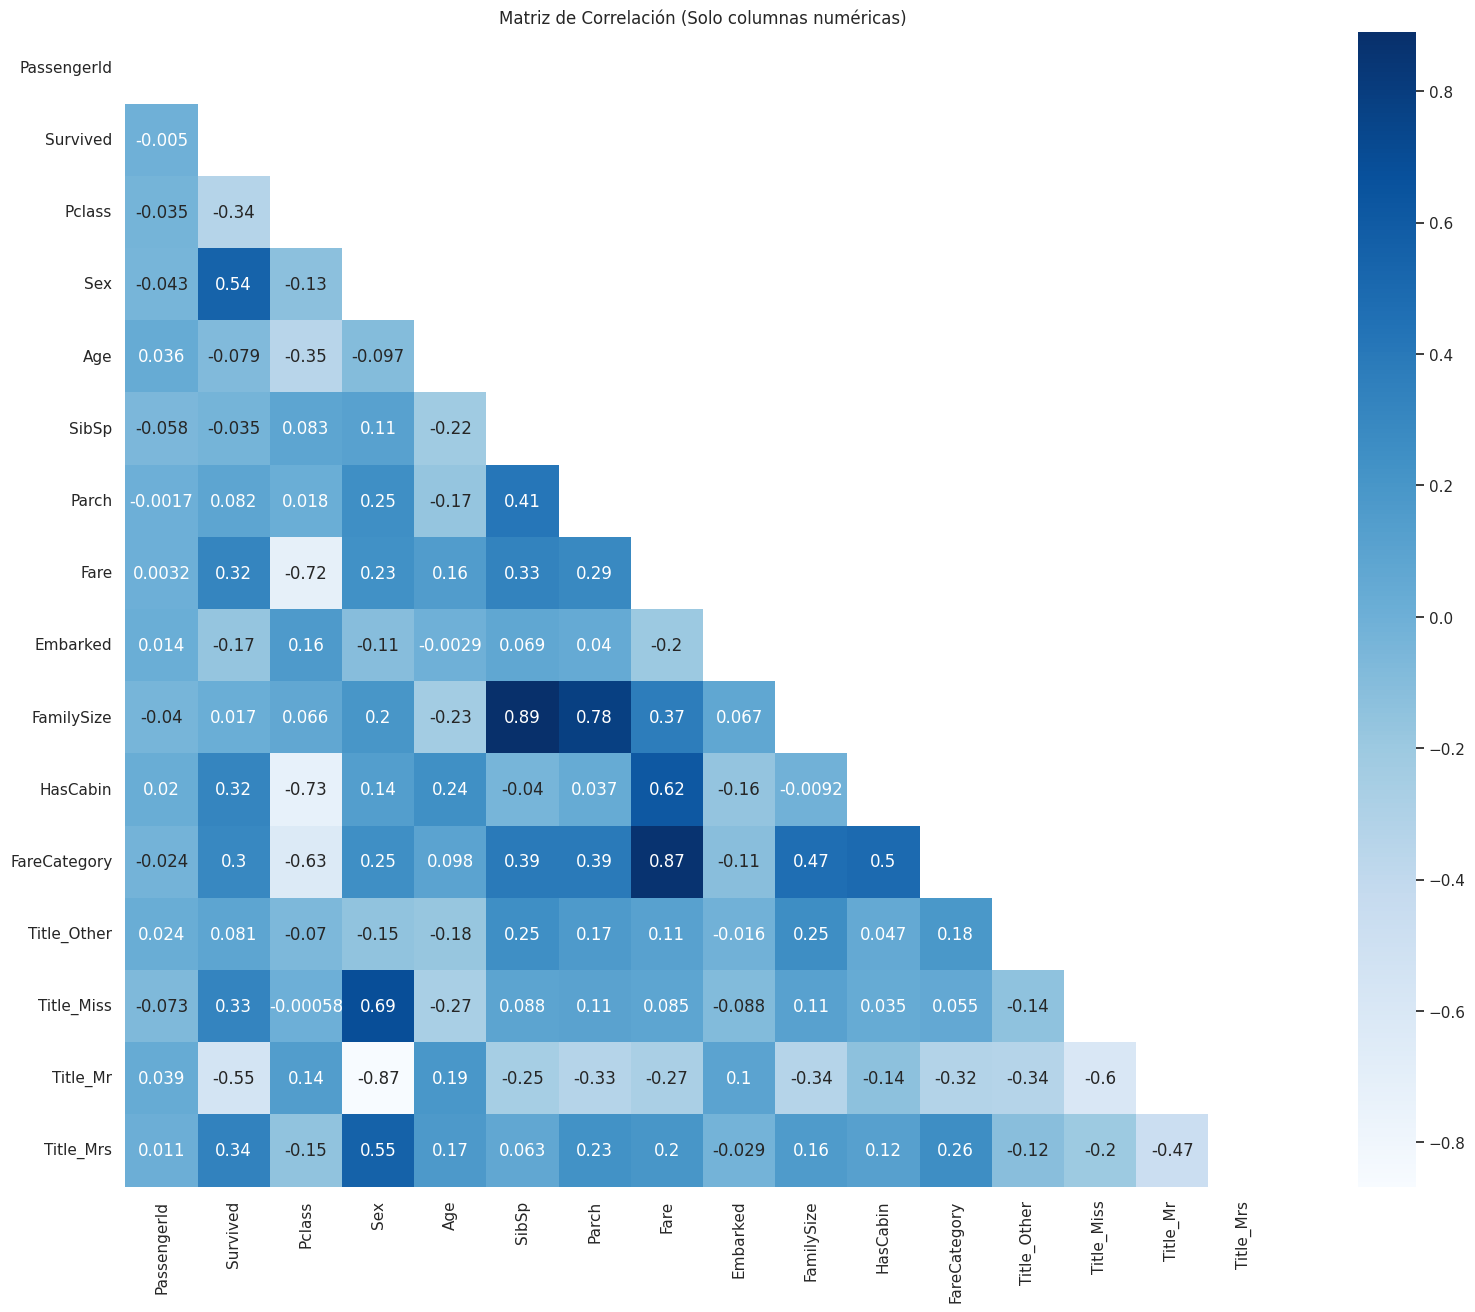

In [179]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Crear una máscara para ocultar la parte superior del triángulo
mask = np.zeros_like(df_numeric.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True

# Configurar el tamaño de la figura y graficar el heatmap
plt.figure(figsize=[20, 15])
sns.heatmap(data=df_numeric.corr(), annot=True, mask=mask, cmap='Blues', square=True)
plt.title('Matriz de Correlación (Solo columnas numéricas)')
plt.show()

In [195]:
# Define la columna objetivo para calcular las correlaciones
target_column = 'Survived'

# Filtrar solo las columnas numéricas
df_r_numeric = df.select_dtypes(include=[np.number])

# Verificar que la columna objetivo esté en las columnas numéricas
if target_column not in df_r_numeric.columns:
    raise ValueError(f"La columna '{target_column}' no está en las columnas numéricas del DataFrame.")

# Calcular las correlaciones de todas las columnas con la columna objetivo
correlations = df_r_numeric.corr()[target_column].sort_values(ascending=False)

# Convertir las correlaciones a un DataFrame para una mejor visualización
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlación']

# Mostrar el DataFrame de correlaciones
print("Correlaciones con la columna:", target_column)
print(correlation_df)

Correlaciones con la columna: Survived
        Variable  Correlación
0       Survived     1.000000
1            Sex     0.543351
2      Title_Mrs     0.339040
3     Title_Miss     0.327093
4           Fare     0.317430
5       HasCabin     0.316912
6   FareCategory     0.295875
7          Parch     0.081629
8    Title_Other     0.081238
9     FamilySize     0.016639
10   PassengerId    -0.005007
11         SibSp    -0.035322
12           Age    -0.078877
13      Embarked    -0.168426
14        Pclass    -0.338481
15      Title_Mr    -0.549199


In [196]:
# Define la columna objetivo para calcular las correlaciones
target_column = 'Survived'

# Filtrar solo las columnas numéricas
df_r_numeric = df_no_Cabin.select_dtypes(include=[np.number])

# Verificar que la columna objetivo esté en las columnas numéricas
if target_column not in df_r_numeric.columns:
    raise ValueError(f"La columna '{target_column}' no está en las columnas numéricas del DataFrame.")

# Calcular las correlaciones de todas las columnas con la columna objetivo
correlations = df_r_numeric.corr()[target_column].sort_values(ascending=False)

# Convertir las correlaciones a un DataFrame para una mejor visualización
correlation_df_no_Cabin = correlations.reset_index()
correlation_df_no_Cabin.columns = ['Variable', 'Correlación']

# Mostrar el DataFrame de correlaciones
print("Correlaciones con la columna:", target_column)
print(correlation_df_no_Cabin)

Correlaciones con la columna: Survived
      Variable  Correlación
0     Survived     1.000000
1          Sex     0.543351
2         Fare     0.317430
3        Parch     0.081629
4  PassengerId    -0.005007
5        SibSp    -0.035322
6          Age    -0.078877
7     Embarked    -0.168426
8       Pclass    -0.338481


## Análisis

Se realizó la creación de las nuevas características propuestas, incluidas las codificaciones necesarias o cambios de tipo de dato para poder realizar correlaciones y hacer la selección de características en base a esto

# 4. Evaluación de nuevas características:

  – Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.

  – Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

## df todas las características

In [209]:
# Dividir datos

from sklearn.model_selection import train_test_split

# Seleccionar solo las columnas numéricas para el split
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('Survived')  # Eliminar de esta selección la variable objetivo

X = df[numeric_cols]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
# Mostrar las formas de los conjuntos de datos
print("\nForma de los conjuntos de entrenamiento y prueba:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Forma de los conjuntos de entrenamiento y prueba:
X_train: (712, 15)
X_test: (179, 15)
y_train: (712,)
y_test: (179,)


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Modelo básico
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Métricas de evaluación con el df con todas las características incluidas las nuevas")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print('\n')

Métricas de evaluación con el df con todas las características incluidas las nuevas
Accuracy: 0.7821229050279329
F1 Score: 0.7310344827586207




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


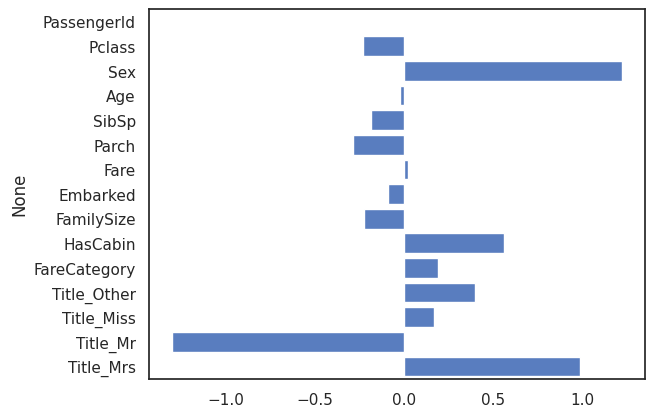

In [212]:
# Importancia de las características
importances = model.coef_[0]
features = X.columns
sns.barplot(x=importances, y=features)
plt.show()

## df con las características con valor absoluto > 0.1 en la correlación, con las nuevas características incluidas


In [213]:
# Seleccionar las características que son mayores a 0.1 en valor absoluto en la correlación para Survived
target_column = 'Survived'

# Filtrar las características con valor absoluto de correlación mayor a 0.1
selected_features = correlation_df[
    (correlation_df['Variable'] != target_column) &  # Excluir la columna objetivo
    (abs(correlation_df['Correlación']) > 0.1)       # Valor absoluto > 0.1
]['Variable'].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[selected_features]  # Características seleccionadas
y = df[target_column]      # Columna objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Características seleccionadas:
['Sex', 'Title_Mrs', 'Title_Miss', 'Fare', 'HasCabin', 'FareCategory', 'Embarked', 'Pclass', 'Title_Mr']


In [214]:
# Mostrar las formas de los conjuntos de datos
print("\nForma de los conjuntos de entrenamiento y prueba:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Forma de los conjuntos de entrenamiento y prueba:
X_train: (712, 9)
X_test: (179, 9)
y_train: (712,)
y_test: (179,)


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Modelo básico
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Métricas de evaluación con el df con todas las características incluidas las nuevas")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print('\n')

Métricas de evaluación con el df con todas las características incluidas las nuevas
Accuracy: 0.7988826815642458
F1 Score: 0.7567567567567568




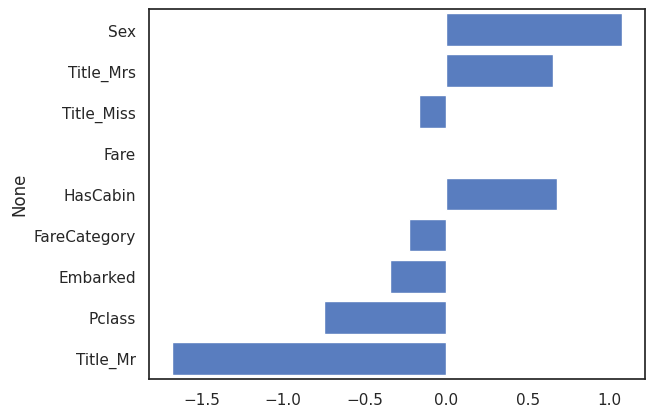

In [216]:
# Importancia de las características
importances = model.coef_[0]
features = X.columns
sns.barplot(x=importances, y=features)
plt.show()

## df_no_Cabin sin la columna Cabin, con todas las características pero sin las nuevas variables

In [217]:
# Dividir datos

from sklearn.model_selection import train_test_split

# Seleccionar solo las columnas numéricas para el split
numeric_cols = df_no_Cabin.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('Survived')  # Eliminar de esta selección la variable objetivo

X = df_no_Cabin[numeric_cols]
y = df_no_Cabin['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
# Mostrar las formas de los conjuntos de datos
print("\nForma de los conjuntos de entrenamiento y prueba:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Forma de los conjuntos de entrenamiento y prueba:
X_train: (712, 8)
X_test: (179, 8)
y_train: (712,)
y_test: (179,)


In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Modelo básico
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Métricas de evaluación con el df con todas las características incluidas las nuevas")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print('\n')

Métricas de evaluación con el df con todas las características incluidas las nuevas
Accuracy: 0.7988826815642458
F1 Score: 0.75




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


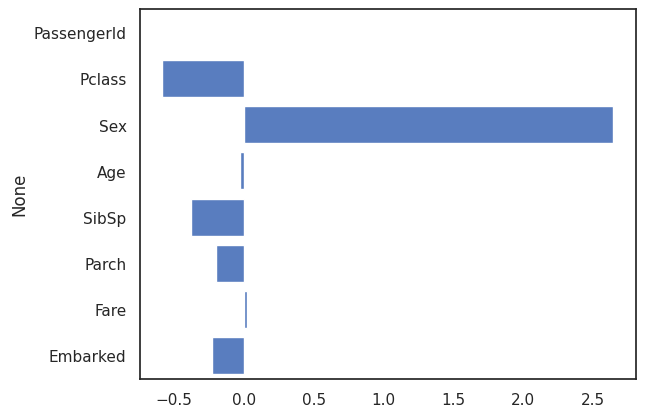

In [220]:
# Importancia de las características
importances = model.coef_[0]
features = X.columns
sns.barplot(x=importances, y=features)
plt.show()

## Análisis

Se realizó el ejercicio con regresión logística para tres casos que se analizaron, así mismo se calcularon las métricas solicitadas, y se realizaron gráficos con el fin de observar las variables que tuvieron mayor impacto, y si estas nuevas variables ayudan a mejorar la capacidad predictiva del modelo

# 5. Interpretación de los resultados:

  – Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?

  – Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.

## Análisis

- Al analizar el df con todas las variables, incluidas las nuevas, se obtiene un ***0.782 de Accuracy y un 0.731 de F1-Score***. Si bien se tiene que se trabajó con 15 características, se tiene que las más importantes son ***Sex, Title_Mrs, Title_Mr, HasCabin***, donde se observa que de estas 3 variables son de las nuevas calculadas, pero también, que las siguientes 3 o 4 variables más importantes también son calculadas sobre las originales

- En el caso del df con todas las variables, incluidas las nuevas, pero con solo las características que dieron un valor absoluto mayor a 0.1 en la correlación, se obtuvo un ***0.798 de Accuracy y un 0.756 de F1-Score***. En este caso se trabajó con 9 características donde ***Sex, Title_Mr, Pclass, HasCabin, Title_Mrs*** son las más importantes, donde nuevamente 3 de las nuevas características están presentes en este top 5.

- Finalmente, en el df donde se eliminó la columna Cabin (por el alto % de valores nulos), y se trabajó con las columnas originales, se obtuvó un ***Accuracy de 0.798 y un F1-Score de 0.75***. Aquí se trabajó con 8 características, donde ***Sex, Pclass, SibSP, Embarked y Parch*** son las más importantes.


## CONCLUSIONES

En general las métricas son muy similares

Pero:

1. Las nuevas características aportan valor predictivo:

Variables como Title y HasCabin son capaces de capturar patrones relevantes, complementando las variables originales.

2. La selección de características es clave:

Reducir el número de variables a las más importantes no solo mejora el rendimiento, sino que también simplifica el modelo, haciéndolo más interpretable y eficiente.

3. El manejo de datos nulos es determinante:

Variables como Cabin pueden no ser útiles directamente debido a su alto porcentaje de valores faltantes, pero aún contienen información indirecta, como lo demuestra el éxito de la variable HasCabin.

4. El balance entre simplicidad y rendimiento:

Trabajar con menos características (relevantes) tiende a ser más práctico sin comprometer el rendimiento.


- Para mejorar estas métricas se podría optimizar hiperparámetros y realizar validación cruzada

OBSERVACIÓN: Si me generá bastante curiosidad el que, la variable de Title y todas las que se desglosan o derivan de esta, están en general relacionadas al Sex, que es la variable más importante en los tres casos analizados. Por ello podría haber posiblemente redundancia... Consultando con GPT, me dio varias opciones a revisar, y pues me animé a revisar una de ellas que se muestra a continuación


In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecciona las columnas relevantes
X = df[['Sex', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Other']]
X = pd.get_dummies(X, drop_first=True)  # Convierte en dummies y elimina una para evitar la trampa de multicolinealidad

# Agrega constante para el cálculo del VIF
X = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
print('\n')

      Variable       VIF
0        const   0.00000
1          Sex  32.43794
2     Title_Mr       inf
3    Title_Mrs       inf
4   Title_Miss       inf
5  Title_Other       inf




/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Sex tiene un VIF de 32.44: Esto sugiere que está fuertemente correlacionada con las otras variables (Title_*), lo que confirma redundancia.

inf para los títulos: Esto ocurre porque las dummies generadas de Title están casi perfectamente correlacionadas entre sí y con Sex. Esto es un síntoma típico cuando las variables categóricas no están bien representadas en el análisis (por ejemplo, no eliminar una dummy redundante en el caso de la trampa de multicolinealidad).

# Análisis de Resultados:

  – El análisis debe centrarse en la importancia de las nuevas variables y su capacidad para mejorar la predicción de la supervivencia en el Titanic. Discute los beneficios de realizar ingeniería de características y cómo estas nuevas variables pueden capturar información latente en los datos originales.